### DATA COLLECTION BY PDF SCRAPING 
(NO NEED TO RUN THIS AS WE HAVE ALREADY ATTACHED THE FILES)

In [ ]:
!pip install tabula-py

     |████████████████████████████████| 11.7MB 344kB/s 


In [ ]:
import tabula
mydf=tabula.read_pdf("/content/dataset1.pdf",pages=2)

FileNotFoundError: ignored

In [ ]:
mydf

In [ ]:
mydf[0]

In [ ]:
print(len(mydf[0]))

In [ ]:
df=tabula.read_pdf("/content/dataset1.pdf",pages=34)
df[0]

In [ ]:
import pandas as pd
def pdfscraper(first,last,mydf):
  if first == last:
    temp_first=tabula.read_pdf("/content/dataset1.pdf",pages=first)
    temp_first=temp_first[0]
    new_header=temp_first.iloc[0]
    temp_first=temp_first[1:]
    temp_first.columns=new_header
    temp_first=temp_first[:-1]   
    mydf=mydf.append(temp_first,ignore_index=True)     
    return mydf

  temp_first=tabula.read_pdf("/content/dataset1.pdf",pages=first)
  temp_first=temp_first[0]
  new_header=temp_first.iloc[0]
  temp_first=temp_first[1:]
  temp_first.columns=new_header
  mydf=mydf.append(temp_first,ignore_index=True)
  for i in range(first+1,last):
    print(i)  
    temp=tabula.read_pdf("/content/dataset1.pdf",pages=i)
    mydf=mydf.append(temp[0],ignore_index=True)
    if len(mydf.columns) > 7:
      print(mydf)
  temp_last=tabula.read_pdf("/content/dataset1.pdf",pages=last)
  temp_last=temp_last[0]
  temp_last=temp_last[:-1]
  mydf=mydf.append(temp_last,ignore_index=True)
  return mydf

In [ ]:
#first_pagel=[1648,1779,1893]
#last_pagel=[1658,1794,1899]
#first_pagel=[1866]
#last_pagel=[1892]
first_pagel=[34,64,92,191,1221,1271,1285,1682,1795,1778,1866,1900,1904,1910,1913,1923,1925,1928,1930,1934,1943,1949,1952,1955]
last_pagel=[48,84,92,225,1247,1280,1285,1682,1795,1778,1892,1900,1908,1910,1916,1923,1925,1928,1933,1934,1943,1949,1952,1958]

In [ ]:
temp1=tabula.read_pdf("/content/dataset1.pdf",pages=35)
df2=pd.DataFrame(columns=temp1[0].columns)
for i in range(len(first_pagel)):
  temp=tabula.read_pdf("/content/dataset1.pdf",pages=first_pagel[i])
  temp=temp[0]
  header=temp.iloc[0]
  tempdf=pd.DataFrame(columns=header)
  tempdf=pdfscraper(first_pagel[i],last_pagel[i],tempdf)
  tempdf=tempdf[1:]
  tempdf.columns=temp1[0].columns
  df2=df2.append(tempdf)
df2

In [ ]:
newdf=df2
columns=['S.NO', 'Name of Plant', 'Installed Capacity (MW)', 'Type',
       'Location (District)', 'State', 'Date of Commissioning']
df2.columns=columns
newdf

In [ ]:
df2 = df2.reset_index()
df2

In [ ]:
df2.to_json("Dataset.json",orient="records",lines=True)

In [ ]:
test=tabula.read_pdf("/content/dataset1.pdf",pages=1893)
test[0]

In [ ]:
temp_first=tabula.read_pdf("/content/dataset1.pdf",pages=1866)
temp_first=temp_first[0]
new_header=temp_first.iloc[0]
temp_first=temp_first[1:]
temp_first.columns=new_header
temp_first

In [ ]:
temp_last=tabula.read_pdf("/content/dataset1.pdf",pages=1794)
temp_last=temp_last[0]
temp_last=temp_last[:-1]
temp_last

In [ ]:
df2=df2.append(temp_first)
df2=df2.append(temp_last)

In [ ]:
df2

In [ ]:
df=tabula.read_pdf("/content/dataset1-pages-1648-1658.pdf",pages="all")
df

In [ ]:
print(df[3])

In [ ]:
temp_first=df[0]
new_header=temp_first.iloc[0]
temp_first=temp_first[1:]
temp_first.columns=new_header
temp_first

In [ ]:
import pandas as pd
mydf=pd.DataFrame(columns=new_header)
mydf=mydf.append(temp_first)
for i in range(len(df)):
  test=df[i]
  if all(test.columns == new_header):
    mydf=mydf.append(test)
  else:
    a_series = pd.Series(test.columns, index = new_header)
    test.columns=new_header
    test = test.append(a_series, ignore_index=True)
    mydf=mydf.append(test)
mydf

In [ ]:
mydf.to_json("Maharashtra.json",orient="records",lines=True)

In [ ]:
test=df[1]
test

In [ ]:
import pandas as pd
a_series = pd.Series(test.columns, index = new_header)
test.columns=new_header
test = test.append(a_series, ignore_index=True)
test

In [ ]:
test.columns=new_header
test

In [ ]:
df=tabula.read_pdf("/content/dataset1-1893-1899.pdf",pages="all")
df

In [ ]:
df[1]

In [ ]:
newdf=pd.read_csv("Dataset.csv")
newdf

In [ ]:
newdf=newdf.drop(columns=["index"])
header=newdf.columns
header

In [ ]:
Mdf=pd.read_csv("Maharashtra.csv")
Mdf

In [ ]:
Mdf.columns = header
Mdf

In [ ]:
newdf=newdf.append(Mdf)
newdf

In [ ]:
newdf.to_csv("Dataset2.csv")

In [ ]:
!pip install geocoder


# GEOCODER

In [ ]:
import pandas as pd
import numpy as np
import geocoder # import geocoder
#geo = pd.read_csv ('Datasetv4.csv')
#geo.head()
# initialize your variable to None
# geo['Latitude'] = np.nan
# geo['Longitude'] = np.nan
latitudes=[]
longitudes=[]
count=0
# loop until you get the coordinates
for index,row in mydf2.iterrows():
    print(count)
    lat_lng_coords = None
    if row['Location (District)'] != 'null' or row['Location (District)'] != None:
      neighbourhood=row['Location (District)']
      while(lat_lng_coords is None):
          print('2')
          g = geocoder.arcgis('{}, Madhya Pradesh, India'.format(neighbourhood))
          lat_lng_coords = g.latlng
      count=count+1
      mydf2['Latitude'][index]=lat_lng_coords[0]
      mydf2['Longitude'][index]=lat_lng_coords[1]
    # latitudes.append(lat_lng_coords[0])
    # longitudes.append(lat_lng_coords[1])
# geo['Latitude']=latitudes
# geo['Longitude']=longitudes
mydf2.head()

In [ ]:
#geo = pd.read_csv ('Datasetv4.csv')
mydf2

## API CALLS (DO NOT USE THIS)

In [ ]:
https://developer.nrel.gov/api/solar/solar_resource/v1.json&api_key=yRZwIVXjF3UpBdaa5geZGe59JcmnRgK6T2Tl8Cet&lat=&lon=

## DATA CLEANING

In [ ]:
import pandas as pd
df=pd.read_csv("Dataset - Dataset.csv")
df

In [ ]:
import requests
import json
solrad_monthlyl=[]
solrad_annuall=[]
poa_monthlyl=[]
count=0
for index,row in mydf2.iterrows():
  latitude=row["Latitude"]
  longitude=row["Longitude"]
  if row["Location (District)"] != 'null' or row['Location (District)'] != None :
    #x = requests.get('https://developer.nrel.gov/api/solar/solar_resource/v1.json?api_key=yX3FW5TBvDQ5V41fcoXLGVv0tAUkCKJN45i0DYeD&lat='+str(latitude)+'&lon='+str(longitude))
    #x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=yX3FW5TBvDQ5V41fcoXLGVv0tAUkCKJN45i0DYeD&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt=40&array_type=1&module_type=1&losses=10')
    if count < 900:
      x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=MLcaxtWLUZTpwqIDtOiD7dIHmPcJL0f7P1pKL12b&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt='+str(latitude)+'&array_type=1&module_type=1&losses=10')
    elif count >= 900 and count < 1800:
      x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=yX3FW5TBvDQ5V41fcoXLGVv0tAUkCKJN45i0DYeD&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt='+str(latitude)+'&array_type=1&module_type=1&losses=10')
    else:
      x = requests.get('https://developer.nrel.gov/api/pvwatts/v6.json?api_key=dR5PHsF6KtKuoiUXXwOOQLnvTptbEXK4cqMdBWy6&lat='+str(latitude)+'&lon='+str(longitude)+'&system_capacity=4&azimuth=180&tilt='+str(latitude)+'&array_type=1&module_type=1&losses=10')
    y=json.loads(x.text)
    print(y)
    try:
      solrad_monthlyl.append(y["outputs"]["solrad_monthly"])
    except:
      solrad_monthlyl.append("null")
    try:
      solrad_annuall.append(y["outputs"]["solrad_annual"])
    except:
      solrad_annuall.append("null")
    try:
      poa_monthlyl.append(y["outputs"]["poa_monthly"])
    except:
      poa_monthlyl.append("null")
  else:
    solrad_monthlyl.append("null")
    solrad_annuall.append("null")
    poa_monthlyl.append("null")
  count=count+1
  print(count)

In [ ]:
import requests
x=requests.get("https://developer.nrel.gov/api/solar/solar_resource/v1.json?api_key=MLcaxtWLUZTpwqIDtOiD7dIHmPcJL0f7P1pKL12b&lat="+str(40)+"&lon="+str(-102))
print(x.text)

In [ ]:
print(latitude,longitude)

In [ ]:
x=requests.get("https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?&request=execute&identifier=SinglePoint&parameters=KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN&startDate=20200201&endDate=20200216&userCommunity=SSE&tempAverage=DAILY&outputList=CSV&lat=14.0000&lon=77.6")
print(x.text)

In [ ]:
print(len(solrad_annuall),len(solrad_monthlyl),len(poa_monthlyl))

In [ ]:
mydf2["Solar Rad Monthly"]=solrad_monthlyl
mydf2["Solar Rad Annual"] = solrad_annuall
mydf2["poa monthly"] = poa_monthlyl
mydf2

In [ ]:
mydf2.to_csv("Dataset_MP.csv")

In [ ]:
import numpy as np
df[df["Longitude"]==32.99444 ]

In [ ]:
df.dtypes

In [ ]:
import pandas as pd
mydf=pd.read_csv("Dataset_extended.csv")
mydf

In [ ]:
mydf[(mydf["Latitude"] == 32.994440000000004) & (mydf["Longitude"]==74.34722) & (mydf["Solar Rad Monthly"].isnull())]
newdf=pd.DataFrame(columns=mydf.columns)
for index,row in mydf.iterrows():
  if (row["Latitude"] == 32.994440000000004) & (row["Longitude"]==74.34722):
    row["Solar Rad Monthly"] = "null"
    row["Solar Rad Annual"] = "null"
    row["poa monthly"] = "null"
  newdf=newdf.append(row)
newdf

In [ ]:
newdf[(mydf["Latitude"] == 32.994440000000004) & (mydf["Longitude"]==74.34722)]

In [ ]:
mydf.iloc[2093]["Longitude"]

In [ ]:
newdf.to_csv("Dataset_extended2.csv")

In [ ]:
mydf2=pd.read_csv("/content/Dataset - Dataset (1).csv")

In [ ]:
mydf2=mydf2[mydf2["State"]=="Madhya Pradesh"]

In [ ]:
mydf2

### Grouping of dataset by year of commissioning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Dataset - Dataset (1).csv")
df_new=df[~df['poa monthly'].isnull()]
df_new
temp=df_new['Date of Commissioning']
temp=temp.values
y=[]
for i in range(len(temp)):
  #print(i)
  try:
    y.append(str(temp[i]).split('-')[2])
  except:
    y.append(0)
new_indices=[]
for i in range(len(y)):
  if y[i]=='12':
    new_indices.append('2012')
  elif y[i]=='13':
    new_indices.append('2013')
  elif y[i]=='14':
    new_indices.append('2014')
  elif y[i]=='15':
    new_indices.append('2015')
  elif y[i]=='16':
    new_indices.append('2016')
  elif y[i]=='17':
    new_indices.append('2017')
  elif y[i]=='18':
    new_indices.append('2018')
  else:
    new_indices.append(y[i])
new_indices
df_new['year']=new_indices

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Yearwise installed capacity 

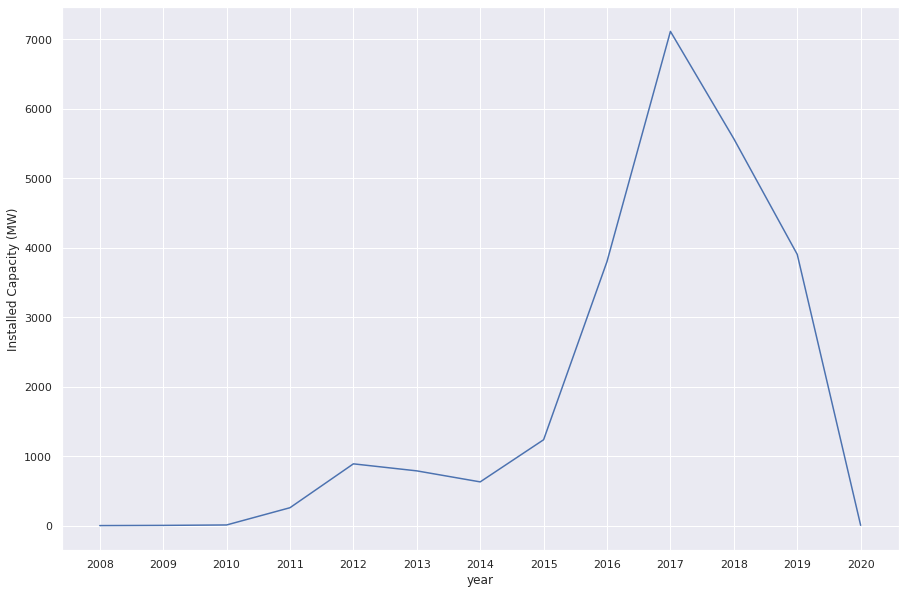

In [ ]:
temp1=df_new.groupby(by='year')['Installed Capacity (MW)'].sum()
temp1=temp1[1:]
sns.set()
plt.figure(figsize=(15,10))
sns.lineplot(x=temp1.index,y=temp1)
plt.show()

### Yearwise count of plants

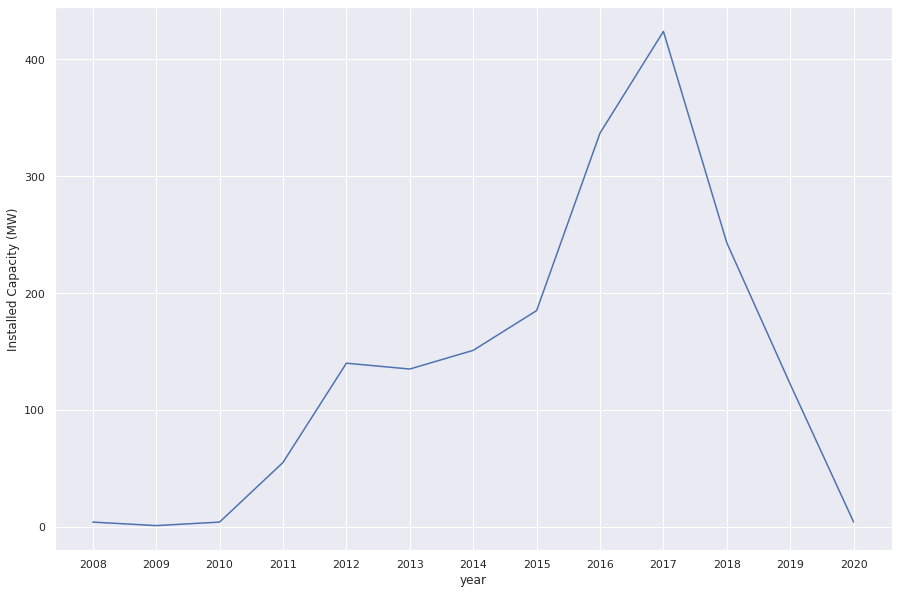

In [ ]:
temp1=df_new.groupby(by='year')['Installed Capacity (MW)'].count()
#temp1
temp1=temp1[1:]
sns.set()
plt.figure(figsize=(15,10))
sns.lineplot(x=temp1.index,y=temp1)
plt.show()

In [ ]:
# distributions=[stats.weibull_min,stats.norm,stats.weibull_max,
#               stats.invgauss,stats.uniform,stats.gamma,stats.expon,   
#               stats.lognorm,stats.pearson3,stats.triang,stats.rayleigh]
# dist_names = ['weibull_min','norm','weibull_max',
#               'invgauss','uniform','gamma','expon',   
#               'lognorm','pearson3','triang','rayleigh']
# #sns.displot(df["Solar Rad Annual"])

In [ ]:
# newdf = df[~df["Solar Rad Annual"].isnull()]
# newdf=newdf.drop(index=2122)
# sns.displot(newdf["Solar Rad Annual"].astype("float"),kind='kde')

In [ ]:
#sns.displot(newdf["Average domestic electricity rates in Rs./KWh"],kind='kde')

In [ ]:
#sns.displot(newdf["Installed Capacity (MW)"],kind='kde')

In [ ]:
#from scipy import stats


In [ ]:
# def myfun(name,dist_names,newdf,distributions):
#   for i in range(len(dist_names)):
#     print("The well known distribution against which kstest is performed is"+" "+dist_names[i])
#     newdf=newdf[~newdf[name].isnull()]
#     args=distributions[i].fit(list(map(float,list(newdf[name]))))
#     print(stats.kstest(list(map(float,list(newdf[name]))),dist_names[i],args=args)[1])

In [ ]:
# myfun("Installed Capacity (MW)",dist_names,newdf,distributions)
# myfun("Average domestic electricity rates in Rs./KWh",dist_names,newdf,distributions)

In [ ]:
# sns.displot(sample,kind='kde')

In [ ]:
# print(stats.kstest(sample,'expon',args=(400.00117718310196, 1.0012504597130487)))

In [ ]:
# for i in range(len(dist_names)):
#   args=distributions[i].fit(sample)
#   print(stats.kstest(sample,name,args=args))

In [ ]:
# distribution = stats.expon

In [ ]:
# sample=list(map(float,list(newdf["Installed Capacity (MW)"])))
# print(sample)
# newdf=newdf[~newdf["Installed Capacity (MW)"].isnull()]
# sample=list(map(float,list(newdf["Installed Capacity (MW)"])))
# args=distribution.fit(sample)
# print(stats.kstest(sample,'expon',args=args))

## VISUALIZATION :

### Statewise elctricity rates and statewise electricity consumption

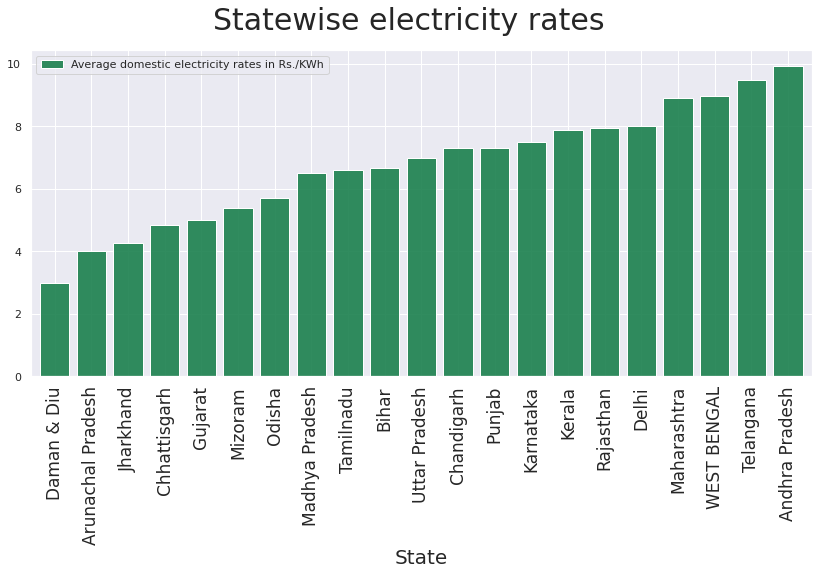

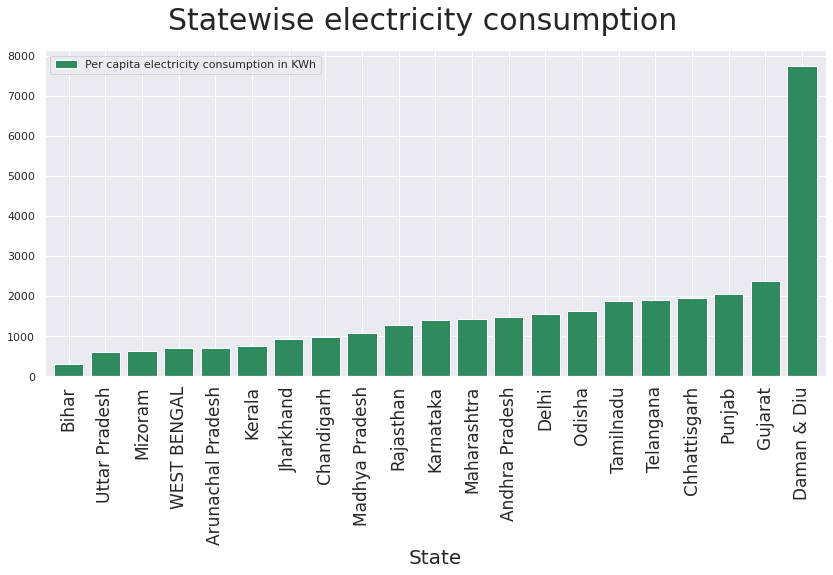

In [ ]:
import matplotlib.pyplot as plt
Data2 = df.groupby(df['State']).mean()
Data3 = Data2[['Average domestic electricity rates in Rs./KWh']]
Data3 = Data3.sort_values('Average domestic electricity rates in Rs./KWh')
Data3.plot.bar(rot=0, figsize = (14,6), color = (0.1, 0.5, 0.3, 0.9), width = 0.8)
plt.xlabel('State', fontsize=20)
plt.suptitle('Statewise electricity rates', fontsize=30)
plt.xticks(rotation=90, horizontalalignment="center", fontsize = 17)
plt.show()
print('\n')
import matplotlib.pyplot as plt
Data4 = Data2[['Per capita electricity consumption in KWh']]
Data4 = Data4.sort_values('Per capita electricity consumption in KWh')
Data4.plot.bar(rot=0,figsize = (14,6),color = (0.1, 0.5, 0.3, 0.9), width = 0.8)
plt.xlabel('State', fontsize=20)
plt.suptitle('Statewise electricity consumption', fontsize=30)
plt.xticks(rotation=90, horizontalalignment="center", fontsize = 17)
plt.show()

### Statewise installed capacity and no. of plants

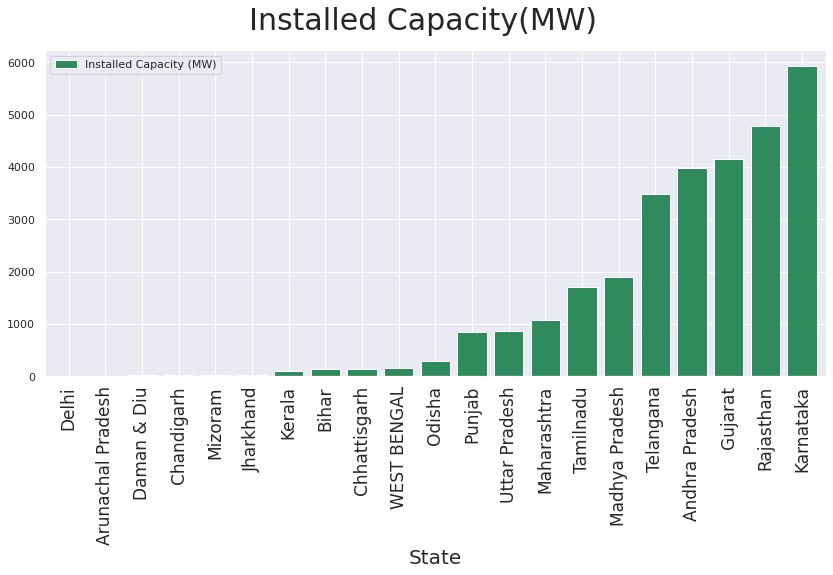

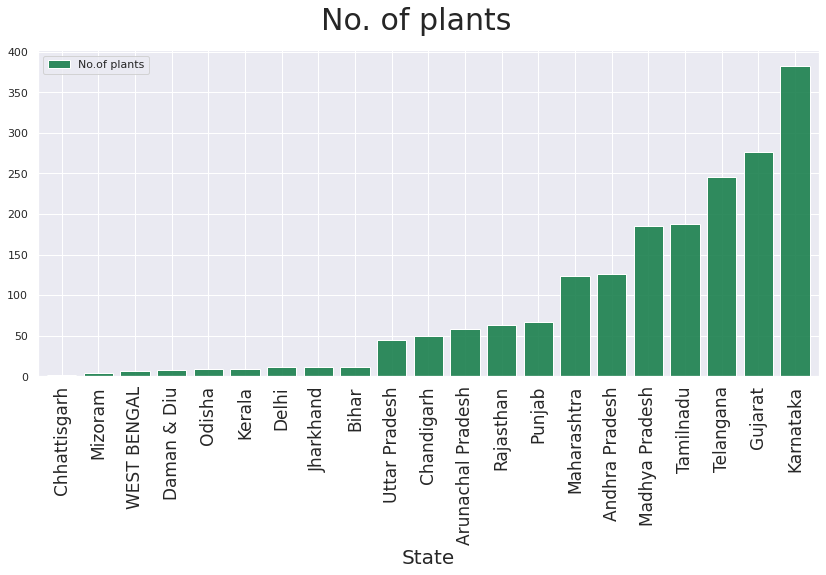

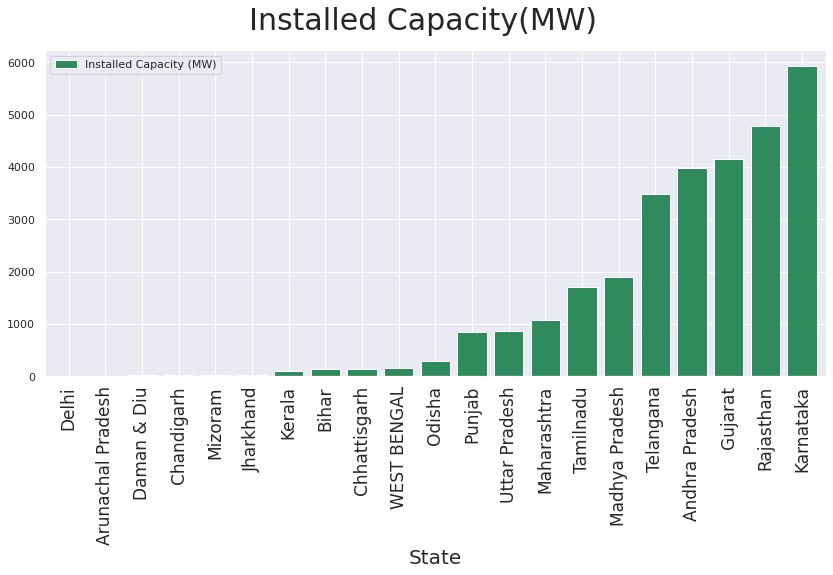

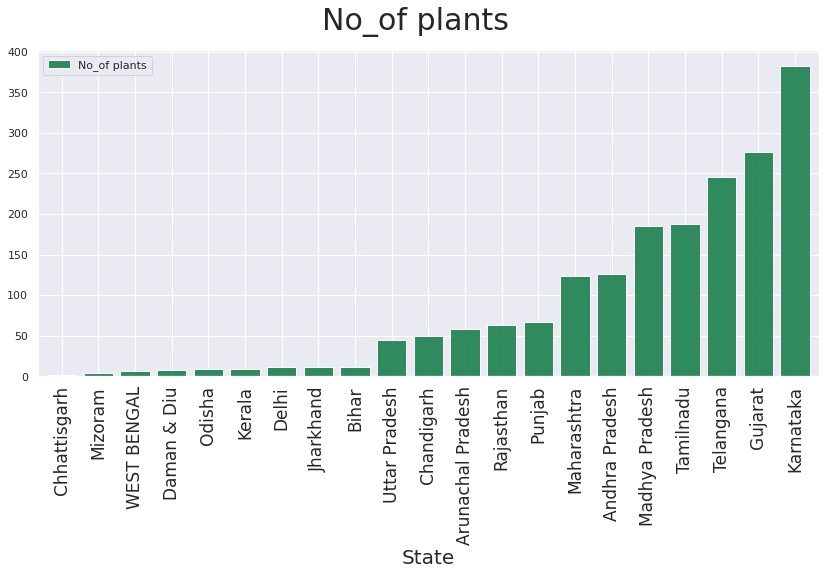

In [ ]:

# df.fillna(0)
df.head()
# df['State']


df1 = df.groupby(df['State']).sum()
col=['Installed Capacity (MW)']
df2 = df1[col]
df2


df3 =df2.drop(['Installed Capacity (MW)'], axis=1)
plants = [126,58,11,49,2,7,11,276,11,383,9,185,124,4,9,67,63,188,245,45,6] 
df3['No.of plants'] = plants
df3

import matplotlib.pyplot as plt
df2 = df2.sort_values('Installed Capacity (MW)')
df2.plot.bar(rot=0, figsize = (14,6), color = (0.1, 0.5, 0.3, 0.9), width = 0.8)
plt.xlabel('State', fontsize=20)
plt.suptitle('Installed Capacity(MW)', fontsize=30)
plt.xticks(rotation=90, horizontalalignment="center", fontsize = 17)
plt.show()
print('\n')
# df2.plot.bar(rot=0,figsize=(10,8))
# plt.xticks(rotation=90, horizontalalignment = "center")
# plt.show()
df3 = df3.sort_values('No.of plants')
df3.plot.bar(rot=0, figsize = (14,6), color = (0.1, 0.5, 0.3, 0.9), width = 0.8)
plt.xlabel('State', fontsize=20)
plt.suptitle('No. of plants', fontsize=30)
plt.xticks(rotation=90, horizontalalignment="center", fontsize = 17)
plt.show()
# df3.plot.bar(rot=0,figsize=(10,8))
# plt.xticks(rotation=90, horizontalalignment = "center")
# plt.show()# df.fillna(0)
df.head()
# df['State']


df1 = df.groupby(df['State']).sum()
col=['Installed Capacity (MW)']
df2 = df1[col]
df2


df3 =df2.drop(['Installed Capacity (MW)'], axis=1)
plants = [126,58,11,49,2,7,11,276,11,383,9,185,124,4,9,67,63,188,245,45,6] 
df3['No_of plants'] = plants
df3

import matplotlib.pyplot as plt
df2 = df2.sort_values('Installed Capacity (MW)')
df2.plot.bar(rot=0, figsize = (14,6), color = (0.1, 0.5, 0.3, 0.9), width = 0.8)
plt.xlabel('State', fontsize=20)
plt.suptitle('Installed Capacity(MW)', fontsize=30)
plt.xticks(rotation=90, horizontalalignment="center", fontsize = 17)
plt.show()
print('\n')
# df2.plot.bar(rot=0,figsize=(10,8))
# plt.xticks(rotation=90, horizontalalignment = "center")
# plt.show()
df3 = df3.sort_values('No_of plants')
df3.plot.bar(rot=0, figsize = (14,6), color = (0.1, 0.5, 0.3, 0.9), width = 0.8)
plt.xlabel('State', fontsize=20)
plt.suptitle('No_of plants', fontsize=30)
plt.xticks(rotation=90, horizontalalignment="center", fontsize = 17)
plt.show()
# df3.plot.bar(rot=0,figsize=(10,8))
# plt.xticks(rotation=90, horizontalalignment = "center")
# plt.show()

### Districtwise installed capacity

In [4]:
import folium
import pandas as pd
import math
df = pd.read_csv('Data.csv')
df2 = df[~df['Latitude'].isnull()]
df2 = df2.groupby(['Location (District)','Latitude','Longitude'])['Installed Capacity (MW)'].sum()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2.head(10)
df2.columns

n = folium.Map(location=[20.5937, 78.9629], zoom_start=4.5)
for index,row in df2.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius = math.sqrt(float(row['Installed Capacity (MW)'])/10),
        popup="Capacity : %s"%row['Installed Capacity (MW)'],
        tooltip = row['Location (District)'],
        color="green",
        fill_color="green"
    ).add_to(n)
n

In [ ]:
# from numpy import random
# sample = random.exponential(size = 1000)
# sample = sample +400
# print(list(sample))

### Annual solar adiation of the existing plants

In [5]:
# lat = df['Latitude']
# lon = df['Longitude']
# solarRad = df['Solar Rad Annual']

# # print(lat)
# # print(lon)
# # print(solarRad)
# this_map = folium.Map(location=[20.5937, 78.9629], zoom_start=4.5)



# newIntSolarRad = []
# for i in solarRad:
#     if i != '\nnull':
#         newIntSolarRad.append(float(i))
#     else:
#         newIntSolarRad.append(-1)

# maxSolarRad = max(newIntSolarRad)



# for i in range(len(newIntSolarRad)):
#     if newIntSolarRad[i] != -1:
#         if i not in [1135, 1136]:
#             colors = ['yellow', 'orange', 'red']
#             if newIntSolarRad[i] <= 5.7:
#                 currColor = colors[0]
#             elif newIntSolarRad[i] <= 6.0:
#                 currColor = colors[1]
#             else:
#                 currColor = colors[2]
# #             print(i)
# #             print([lat[i], lon[i]])
# #             print(' ')
#             folium.CircleMarker(location=[lat[i], lon[i]], radius=2, weight=10, color=currColor).add_to(this_map)

# this_map

### Grouping the dataset by district

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
mydf=pd.read_csv("/Dataset - Dataset (1).csv")
#print(mydf.columns)
newdf=mydf.groupby(['Location (District)'],as_index=False).agg({'Installed Capacity (MW)':'sum','Latitude':'mean','Longitude':'mean','Average domestic electricity rates in Rs./KWh':'mean','Per capita electricity consumption in KWh':'mean'})
newdf["Solar Rad Monthly"]=mydf[mydf["Location (District)"]=="Ananthapuramu"]["Solar Rad Monthly"]
for i,row in newdf.iterrows():
  print(row["Location (District)"])
#newdf["Solar Rad Monthly"]=mydf[mydf["Location (District)"]=="Ananthapuramu"]["Solar Rad Monthly"]
SolarRadMonthly=[]
SolarRadAnnual=[]
poamonthly=[]
count=0
for i,row in newdf.iterrows():
  SolarRadMonthly.append(mydf[mydf["Location (District)"]==row["Location (District)"]]["Solar Rad Monthly"].iloc[0])
  SolarRadAnnual.append(mydf[mydf["Location (District)"]==row["Location (District)"]]["Solar Rad Annual"].iloc[0])
  poamonthly.append(mydf[mydf["Location (District)"]==row["Location (District)"]]["poa monthly"].iloc[0])
  count=count+1
#print(count)
newdf['Solar Rad Monthly']=SolarRadMonthly
newdf['Solar Rad Annual']=SolarRadAnnual
newdf['poa monthly']=poamonthly
newdf = newdf[~newdf["Solar Rad Monthly"].isnull()]
mydf[(mydf["Latitude"] == 32.994440000000004) & (mydf["Longitude"]==74.34722)]
newdf.isnull().values.sum()
for i in newdf.columns:
  if newdf[i].isnull().any():
    print(i)
newdf[newdf["poa monthly"].isnull()]
newdf=newdf.drop(21)
newdf[newdf["poa monthly"].isnull()]
newdf.to_csv("Dataset-cleaned-groupedbydistricts.csv")

Aalo
Abali
Abhay Jain
Adilabad
Agar Malwa
Ahmedabad
Ajmer
Akshay Mathur
Allahabad
Alwar
Amit Gupta
Amit Panchalwar
Amreli
Amritsar
Anand
Anand Darekar
Ananthapuramu
Andheri East Mumbai
Aravakurichi
Aravalli
Arupukkottai
Arvind Sharma ,\rKholapur
Ashish Navalakha\rPune
Aurangabad
Avadi, Chennai
BBMB
BHARUCH
Badaun
Bagalkote
Balangir
Banaskantha
Banda
Bandra East Mumbai
Bangalore Rural
Bareilly
Bargarh
Barmer
Barod
Bathinda
Bathinda.
Belagavi
Bellary
Bengaluru\rUrban
Bercha
Bhadla
Bharuch
Bhatinda
Bhavnagar
Bhilwara
Bhopal
Bidar
Bihar
Bikaner
Bolangir
Burail
Chamarajanagar
Chandigarh, Sites
Changlang
Charanka
Chief Engineer (SPGD-\rP)
Chikkaballapura
Chintalapudi
Chitradurga
Chittor
Chittorgarh
Churu
Cihm Chandigarh
Coimbatore
Cuddalore
DAMAN
DAMAN & DIU
DIU
Dadri
Davanagere
Deepak Bansal
Deepak Zade
Deomali
Devbhumi Dwarka
Dewas
Dhanas Lake\rChandigarh
Dhar
Dharwad
Dibang
Dindigul
Durg
Erode
Fazilka
GCG-11, Chandigarh
GCM-11 Chandigarh
Gadag
Gandhinagar
Ganjbasoda
Gawalior
Godavari
Gunt

In [ ]:
#mydf[['Solar Rad Monthly','Solar Rad Annual','poa monthly']]= mydf[['Solar Rad Monthly','Solar Rad Annual','poa monthly']].apply(pd.to_numeric)

# Correlation with weather data

###Production data of the Plant

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('/content/sample_data/jagalur_hourlyv1.csv')
df

,time,Values
0,01-01-2014 00:00,-0.498
1,01-01-2014 01:00,-0.498
2,01-01-2014 02:00,-0.498
3,01-01-2014 03:00,-0.498
4,01-01-2014 04:00,-0.498
...,...,...
8756,31-12-2014 20:00,-0.496
8757,31-12-2014 21:00,-0.496
8758,31-12-2014 22:00,-0.496
8759,31-12-2014 23:00,-0.496


In [ ]:
df.drop(8760,axis=0,inplace=True)
df

,time,Values
0,01-01-2014 00:00,-0.498
1,01-01-2014 01:00,-0.498
2,01-01-2014 02:00,-0.498
3,01-01-2014 03:00,-0.498
4,01-01-2014 04:00,-0.498
...,...,...
8755,31-12-2014 19:00,-0.496
8756,31-12-2014 20:00,-0.496
8757,31-12-2014 21:00,-0.496
8758,31-12-2014 22:00,-0.496


In [ ]:
df1 =df.replace(-0.496, np.nan)
df2 = df1.replace(-0.498, np.nan)
df2 = df2.replace(np.nan,0)
# pd.isnull(df2['Values'])
df2.to_csv('jagalur_hourlyv2.csv')
df2

,time,Values
0,01-01-2014 00:00,0.0
1,01-01-2014 01:00,0.0
2,01-01-2014 02:00,0.0
3,01-01-2014 03:00,0.0
4,01-01-2014 04:00,0.0
...,...,...
8755,31-12-2014 19:00,0.0
8756,31-12-2014 20:00,0.0
8757,31-12-2014 21:00,0.0
8758,31-12-2014 22:00,0.0


###Weather Data

In [ ]:
wdf=pd.read_csv('/content/sample_data/weather_data.csv')
wdf

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Jagalur, KA, India",01-01-2014,26.4,17.1,21.2,NaN,NaN,0.0,NaN,7.6,NaN,6.3,30.0,67.49,Partially cloudy
1,"Jagalur, KA, India",01-02-2014,26.2,17.7,21.4,NaN,NaN,0.0,NaN,7.6,NaN,6.3,43.8,64.43,Partially cloudy
2,"Jagalur, KA, India",01-03-2014,28.7,16.7,22.3,NaN,27.7,0.0,NaN,9.4,NaN,6.3,31.3,57.97,Partially cloudy
3,"Jagalur, KA, India",01-04-2014,29.4,17.4,22.3,NaN,27.9,0.0,NaN,5.4,NaN,7.0,25.0,52.18,Clear
4,"Jagalur, KA, India",01-05-2014,30.1,18.4,23.2,NaN,28.3,0.0,NaN,9.4,NaN,7.0,17.5,48.39,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,"Jagalur, KA, India",12/28/2014,25.1,13.7,20.2,NaN,NaN,0.0,NaN,5.4,NaN,6.3,40.0,75.26,Partially cloudy
362,"Jagalur, KA, India",12/29/2014,28.4,17.1,23.0,NaN,28.8,0.0,NaN,3.6,NaN,7.0,27.5,70.58,Partially cloudy
363,"Jagalur, KA, India",12/30/2014,28.4,18.1,22.7,NaN,28.4,0.0,NaN,5.4,NaN,6.3,22.5,70.96,Clear
364,"Jagalur, KA, India",12/31/2014,29.1,18.2,23.2,NaN,28.8,0.0,NaN,5.4,NaN,6.3,38.8,69.54,Partially cloudy


In [ ]:
wdf['Date time'] = pd.to_datetime(wdf['Date time'])
wdf

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Jagalur, KA, India",2014-01-01,26.4,17.1,21.2,NaN,NaN,0.0,NaN,7.6,NaN,6.3,30.0,67.49,Partially cloudy
1,"Jagalur, KA, India",2014-01-02,26.2,17.7,21.4,NaN,NaN,0.0,NaN,7.6,NaN,6.3,43.8,64.43,Partially cloudy
2,"Jagalur, KA, India",2014-01-03,28.7,16.7,22.3,NaN,27.7,0.0,NaN,9.4,NaN,6.3,31.3,57.97,Partially cloudy
3,"Jagalur, KA, India",2014-01-04,29.4,17.4,22.3,NaN,27.9,0.0,NaN,5.4,NaN,7.0,25.0,52.18,Clear
4,"Jagalur, KA, India",2014-01-05,30.1,18.4,23.2,NaN,28.3,0.0,NaN,9.4,NaN,7.0,17.5,48.39,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,"Jagalur, KA, India",2014-12-28,25.1,13.7,20.2,NaN,NaN,0.0,NaN,5.4,NaN,6.3,40.0,75.26,Partially cloudy
362,"Jagalur, KA, India",2014-12-29,28.4,17.1,23.0,NaN,28.8,0.0,NaN,3.6,NaN,7.0,27.5,70.58,Partially cloudy
363,"Jagalur, KA, India",2014-12-30,28.4,18.1,22.7,NaN,28.4,0.0,NaN,5.4,NaN,6.3,22.5,70.96,Clear
364,"Jagalur, KA, India",2014-12-31,29.1,18.2,23.2,NaN,28.8,0.0,NaN,5.4,NaN,6.3,38.8,69.54,Partially cloudy


In [ ]:
wdf.drop(365,axis=0,inplace=True)
wdf

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Jagalur, KA, India",2014-01-01,26.4,17.1,21.2,NaN,NaN,0.0,NaN,7.6,NaN,6.3,30.0,67.49,Partially cloudy
1,"Jagalur, KA, India",2014-01-02,26.2,17.7,21.4,NaN,NaN,0.0,NaN,7.6,NaN,6.3,43.8,64.43,Partially cloudy
2,"Jagalur, KA, India",2014-01-03,28.7,16.7,22.3,NaN,27.7,0.0,NaN,9.4,NaN,6.3,31.3,57.97,Partially cloudy
3,"Jagalur, KA, India",2014-01-04,29.4,17.4,22.3,NaN,27.9,0.0,NaN,5.4,NaN,7.0,25.0,52.18,Clear
4,"Jagalur, KA, India",2014-01-05,30.1,18.4,23.2,NaN,28.3,0.0,NaN,9.4,NaN,7.0,17.5,48.39,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,"Jagalur, KA, India",2014-12-27,27.1,11.1,19.1,NaN,26.2,0.0,NaN,9.4,NaN,6.3,7.5,63.91,Clear
361,"Jagalur, KA, India",2014-12-28,25.1,13.7,20.2,NaN,NaN,0.0,NaN,5.4,NaN,6.3,40.0,75.26,Partially cloudy
362,"Jagalur, KA, India",2014-12-29,28.4,17.1,23.0,NaN,28.8,0.0,NaN,3.6,NaN,7.0,27.5,70.58,Partially cloudy
363,"Jagalur, KA, India",2014-12-30,28.4,18.1,22.7,NaN,28.4,0.0,NaN,5.4,NaN,6.3,22.5,70.96,Clear


In [ ]:
df3 = pd.DataFrame() 
df3['Date time']= wdf['Date time']
df3['Values'] = 0.0
df3

,Date time,Values
0,2014-01-01,0.0
1,2014-01-02,0.0
2,2014-01-03,0.0
3,2014-01-04,0.0
4,2014-01-05,0.0
...,...,...
360,2014-12-27,0.0
361,2014-12-28,0.0
362,2014-12-29,0.0
363,2014-12-30,0.0


In [ ]:
i = 0
j = 0
res = 0.0
while (i<=365 and j<len(df2)):
    for k in range (24) :
        res = res + df2['Values'][j+k] * 4
    df3['Values'][i] = res 
    j = j+k+1
    i = i +1
    res=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df3

,Date time,Values
0,2014-01-01,4654.640
1,2014-01-02,5374.408
2,2014-01-03,5399.320
3,2014-01-04,5468.648
4,2014-01-05,5181.280
...,...,...
360,2014-12-27,5300.208
361,2014-12-28,3837.536
362,2014-12-29,3024.068
363,2014-12-30,5245.108


In [ ]:
DF = pd.DataFrame() 
DF['Values'] = df3['Values']
DF['Maximum Temperature'] = wdf['Maximum Temperature']
DF['Minimum Temperature'] = wdf['Minimum Temperature']
DF['Temperature'] = wdf['Temperature']
DF['Heat Index'] = wdf['Heat Index']
DF['Precipitation'] = wdf['Precipitation']
DF['Visibility'] = wdf['Visibility']
DF['Cloud Cover'] = wdf['Cloud Cover']
DF['Relative Humidity'] = wdf['Relative Humidity']
DF

,Values,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Visibility,Cloud Cover,Relative Humidity
0,4654.640,26.4,17.1,21.2,NaN,0.0,6.3,30.0,67.49
1,5374.408,26.2,17.7,21.4,NaN,0.0,6.3,43.8,64.43
2,5399.320,28.7,16.7,22.3,27.7,0.0,6.3,31.3,57.97
3,5468.648,29.4,17.4,22.3,27.9,0.0,7.0,25.0,52.18
4,5181.280,30.1,18.4,23.2,28.3,0.0,7.0,17.5,48.39
...,...,...,...,...,...,...,...,...,...
360,5300.208,27.1,11.1,19.1,26.2,0.0,6.3,7.5,63.91
361,3837.536,25.1,13.7,20.2,NaN,0.0,6.3,40.0,75.26
362,3024.068,28.4,17.1,23.0,28.8,0.0,7.0,27.5,70.58
363,5245.108,28.4,18.1,22.7,28.4,0.0,6.3,22.5,70.96


In [ ]:
DF = DF.replace(np.nan,0)
DF

,Values,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Visibility,Cloud Cover,Relative Humidity
0,4654.640,26.4,17.1,21.2,0.0,0.0,6.3,30.0,67.49
1,5374.408,26.2,17.7,21.4,0.0,0.0,6.3,43.8,64.43
2,5399.320,28.7,16.7,22.3,27.7,0.0,6.3,31.3,57.97
3,5468.648,29.4,17.4,22.3,27.9,0.0,7.0,25.0,52.18
4,5181.280,30.1,18.4,23.2,28.3,0.0,7.0,17.5,48.39
...,...,...,...,...,...,...,...,...,...
360,5300.208,27.1,11.1,19.1,26.2,0.0,6.3,7.5,63.91
361,3837.536,25.1,13.7,20.2,0.0,0.0,6.3,40.0,75.26
362,3024.068,28.4,17.1,23.0,28.8,0.0,7.0,27.5,70.58
363,5245.108,28.4,18.1,22.7,28.4,0.0,6.3,22.5,70.96


##VISUALIZATION:

###Pearson Correlation

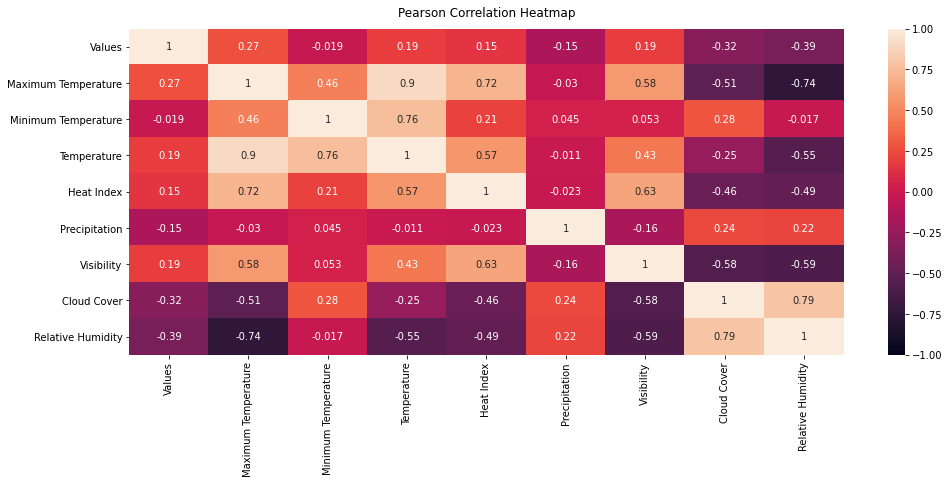

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(DF.corr(method="pearson"), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

###Spearman Correlation

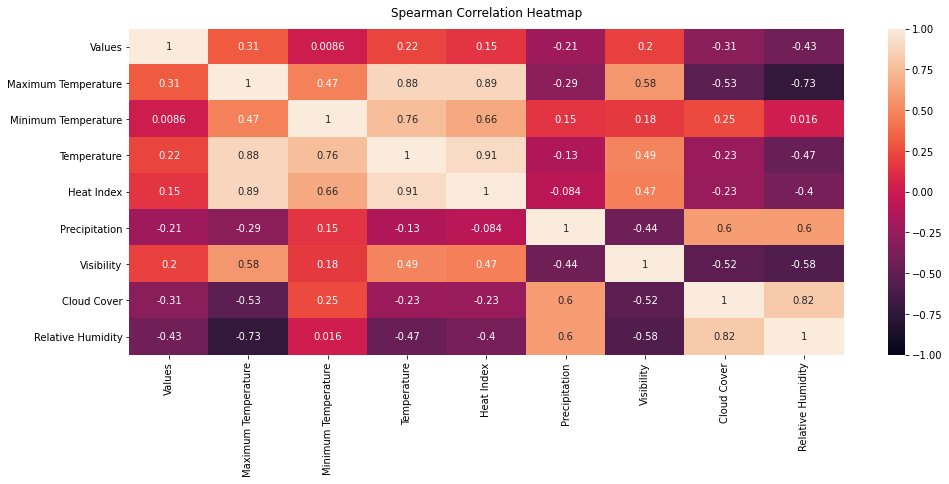

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(DF.corr(method="spearman"), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Spearman Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

###Scatter Plots of Production Values with different attributes present in the weather data

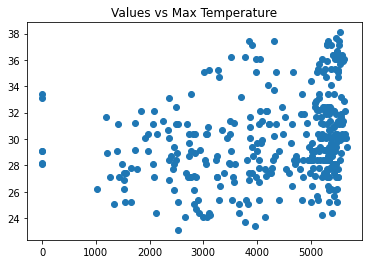

In [ ]:
x= DF['Values']
y=DF['Maximum Temperature']
plt.title("Values vs Max Temperature")
plt.scatter(x,y)

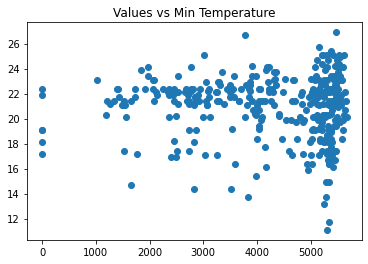

In [ ]:
x= DF['Values']
y=DF['Minimum Temperature']
plt.title("Values vs Min Temperature")
plt.scatter(x,y)


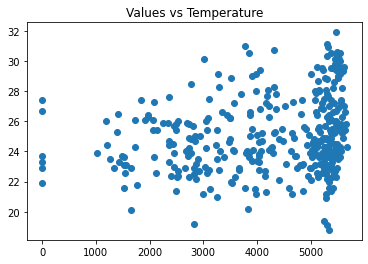

In [ ]:
x= DF['Values']
y=DF['Temperature']
plt.title("Values vs Temperature")
plt.scatter(x,y)


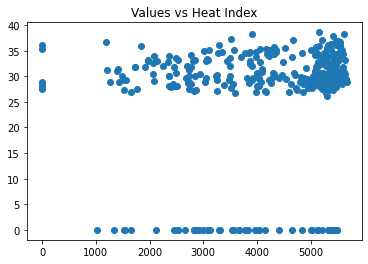

In [ ]:
x= DF['Values']
y=DF['Heat Index']
plt.title("Values vs Heat Index")
plt.scatter(x,y)

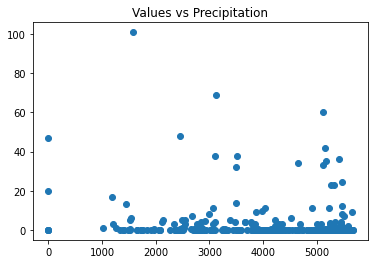

In [ ]:
x= DF['Values']
y=DF['Precipitation']
plt.title("Values vs Precipitation")
plt.scatter(x,y)

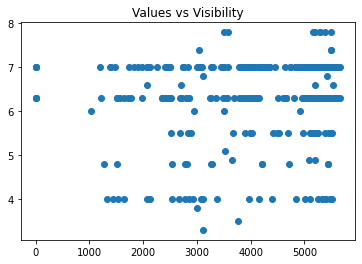

In [ ]:
x= DF['Values']
y=DF['Visibility']
plt.title("Values vs Visibility")
plt.scatter(x,y)

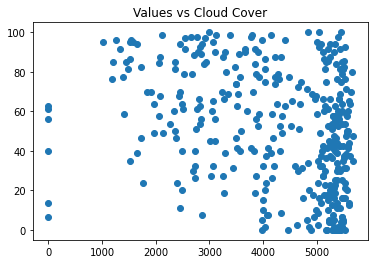

In [ ]:
x= DF['Values']
y=DF['Cloud Cover']
plt.title("Values vs Cloud Cover")
plt.scatter(x,y)

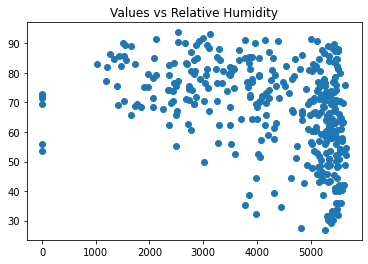

In [ ]:
x= DF['Values']
y=DF['Relative Humidity']
plt.title("Values vs Relative Humidity")
plt.scatter(x,y)